# Azure chat completion models with your own data (RAG)
This example shows how to use Azure OpenAI service models with your own data. 

Azure OpenAI on your data enables you to run supported chat models such as GPT-3.5-Turbo and GPT-4 on your data without needing to train or fine-tune models. Running models on your data enables you to chat on top of, and analyze your data with greater accuracy and speed. One of the key benefits of Azure OpenAI on your data is its ability to tailor the content of conversational AI. Because the model has access to, and can reference specific sources to support its responses, answers are not only based on its pretrained knowledge but also on the latest information available in the designated data source. This grounding data also helps the model avoid generating responses based on outdated or incorrect information.

Azure OpenAI on your own data with Azure AI Search (f.k.a. Azure Cognitive Search) provides a customizable, pre-built solution for knowledge retrieval, from which a conversational AI application can be built. To see alternative methods for knowledge retrieval and semantic search, check out the cookbook examples for [vector databases](https://github.com/openai/openai-cookbook/tree/main/examples/vector_databases).

## How it works

[Azure OpenAI on your own data](https://learn.microsoft.com/azure/ai-services/openai/concepts/use-your-data) connects the model with your data, giving it the ability to retrieve and utilize data in a way that enhances the model's output. Together with Azure AI Search, data is retrieved from designated data sources based on the user input and provided conversation history. The data is then augmented and resubmitted as a prompt to the model, giving the model contextual information it can use to generate a response.

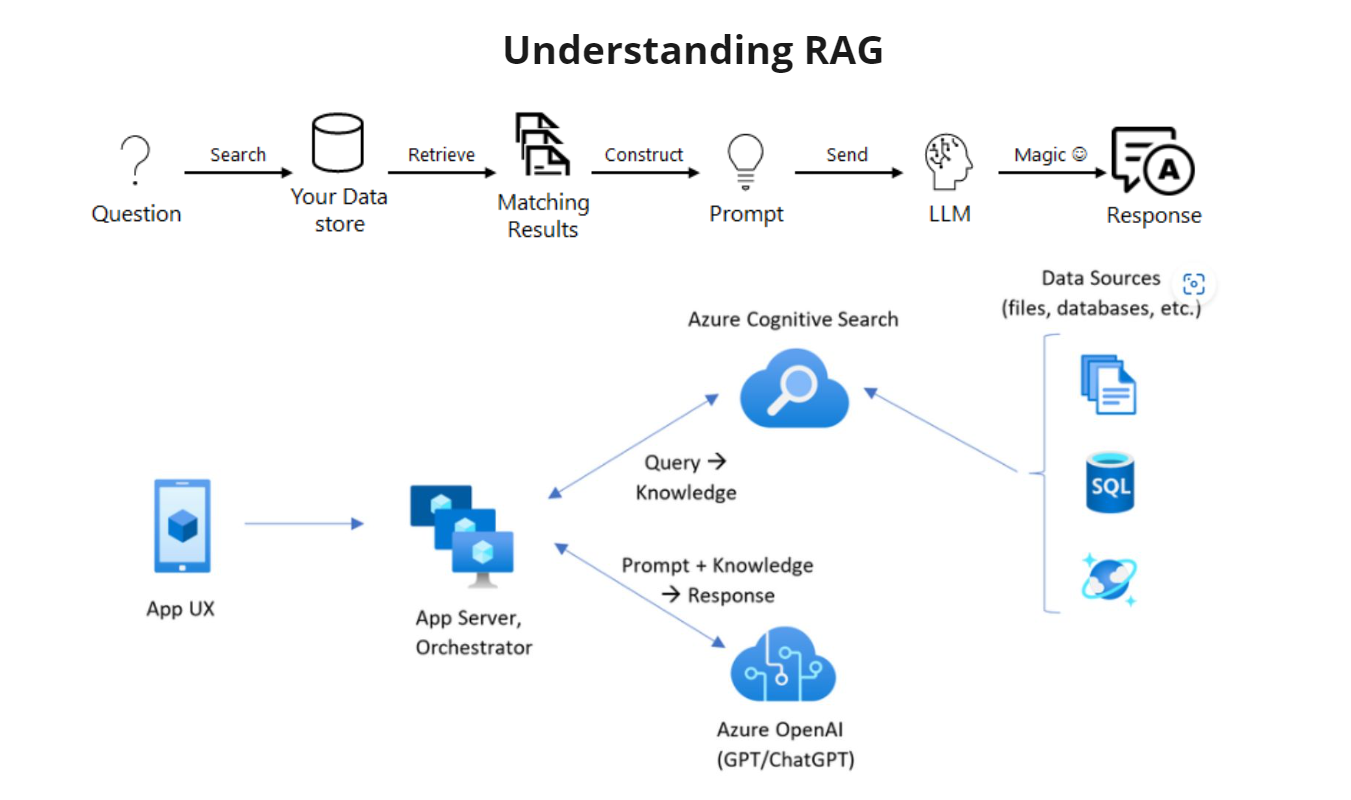

See the [Data, privacy, and security for Azure OpenAI Service](https://learn.microsoft.com/legal/cognitive-services/openai/data-privacy?context=%2Fazure%2Fai-services%2Fopenai%2Fcontext%2Fcontext) for more information.

## Prerequisites
To get started, we'll cover a few prequisites. 

To properly access the Azure OpenAI Service, we need to create the proper resources at the [Azure Portal](https://portal.azure.com) (you can check a detailed guide on how to do this in the [Microsoft Docs](https://learn.microsoft.com/azure/cognitive-services/openai/how-to/create-resource?pivots=web-portal))

To use your own data with Azure OpenAI models, you will need:

1. Azure OpenAI access and a resource with a chat model deployed (for example, GPT-3 or GPT-4)
2. Azure AI Search (f.k.a. Azure Cognitive Search) resource
3. Azure Blob Storage resource
4. Your documents to be used as data (See [data source options](https://learn.microsoft.com/azure/ai-services/openai/concepts/use-your-data#data-source-options))


For a full walk-through on how to upload your documents to blob storage and create an index using the Azure AI Studio, see this [Quickstart](https://learn.microsoft.com/azure/ai-services/openai/use-your-data-quickstart?pivots=programming-language-studio&tabs=command-line).

## Chat completion model with your own data

Below is My example - code generated from Azure Open AI Studio - > Show code option for the example I was working on: 

In [50]:
import openai
import os
from openai import AzureOpenAI
import json
import pandas as pd
from dotenv import load_dotenv
load_dotenv("credentials.env")

True

In [74]:
aoai_endpoint = os.environ["AZURE_OPENAI_ENDPOINT"]
aoai_api_key = os.environ["AZURE_OPENAI_API_KEY"]
deployment_name = "gpt-35-turbo"
aoai_api_version = "2024-02-15-preview" #Using latest version as of this date. Older versions may not work with the code as syntax has changed drastically.

# Azure AI Search setup
search_endpoint = os.getenv("AZURE_SEARCH_ENDPOINT"); # Add your Azure AI Search endpoint here
search_key = os.getenv("AZURE_SEARCH_KEY"); # Add your Azure AI Search admin key here
search_index_name = "cogsrch-index-files"; # Add your Azure AI Search index name here

In [75]:
# Create an Azure OpenAI client.  
client = openai.AzureOpenAI(        
    #base_url=f"{aoai_endpoint}/openai/deployments/{deployment_name}/extensions/",
    azure_endpoint=aoai_endpoint,    
    api_key=aoai_api_key,    
    api_version=aoai_api_version
)
openai.api_key = aoai_api_key

In [76]:

sys_prompt = "You are AI assistant who provides information from retrieved data. If the required information is not available in the retrieved data, apologize and say that the requested information is not available in the retrieved data. You are friendly and concise. Do not provide answers to questions not related to retrieved data or prompt message."
user_prompt = "explain Variants and Genomic Surveillance for SARS- CoV-2"
messages = [{"role": "system", "content": sys_prompt}]
messages.append({"role": "user", "content": user_prompt})

In [77]:
messages

[{'role': 'system',
  'content': 'You are AI assistant who provides information from retrieved data. If the required information is not available in the retrieved data, apologize and say that the requested information is not available in the retrieved data. You are friendly and concise. Do not provide answers to questions not related to retrieved data or prompt message.'},
 {'role': 'user',
  'content': 'explain Variants and Genomic Surveillance for SARS- CoV-2'}]

In [79]:
# Create and return a new chat completion request
    # Be sure to include the "extra_body" parameter to use Azure AI Search as the data source
    #this is Azure Open AI On your data feature

response = client.chat.completions.create(
    model=deployment_name,    
    messages = messages,
    stream=False,
    extra_body={
        "data_sources": [
            {
                "type": "azure_search",
                "parameters": {
                    "endpoint": search_endpoint,                    
                    "index_name": search_index_name,
                    "authentication": {
                        "type": "api_key",
                         "key": search_key 
                    }
                                      
                }
            }
        ]
    }
)    

In [80]:
response.choices[0].message.content

"The genomic surveillance for SARS-CoV-2 in Texas involves monitoring the spread of variants of concern (VOC), variants of interest (VOI), and variants being monitored (VBM) to understand how the virus spreads and changes over time. This surveillance program includes data from CDC's commercial partner laboratories, academic and commercial laboratories, and the Texas Department of State Health Services Austin Laboratory's genomic sequencing. It helps scientists and public health professionals assess the impact of emerging variants on the effectiveness of existing COVID-19 tests, treatments, and vaccines [doc1]."

Please note - this is very basic standard RAG example which uses Azure AI search as a knowledge store. I have intentionally kept this simple for begineers to understand this concept and not included vectorized data and other advanced RAG concepts. Refer other notebooks for advanced RAG examples.